# PyTorch Computer Vision

- [Course Video](https://youtu.be/V_xro1bcAuA)
- [Resource Notebook](https://www.learnpytorch.io/03_pytorch_computer_vision/)
- [GitHub Discussions](https://github.com/mrdbourke/pytorch-deep-learning)

## Computer Vision Libraries in PyTorch
- `torchvision`
- `torchvision.datasets` - get datasets and data loading functions for computer vision here.
- `torchvision.models` - get pre-trained computer vision models that you can leverage for your own problems.
- `torchvision.transforms` - functions for manipulating vision data (images) to be suitable for use with an ML Model.
- `torch.utils.data.Dataset` - Base dataset class for PyTorch.
- `torch.utils.data.DataLoader` - creates a python iterable over a dataset.

In [1]:
# Import Modules
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Check PyTorch Version
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


# Getting a vision dataset

The dataset we will be using is FashionMNIST, which is an alternative of the original MNIST dataset, but instead of pictures of handwritten numbers, is based on pictures of clothing items.

Fortunately for us, the FashionMNIST dataset is built-in with torchvision (`torchvision.datasets.FashionMNIST`), and is readily downloadable from the module.

Most of the torchvision datasets are well-formatted, split and sorted so we don't need to worry about that.

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
  root = "data", # where to download data
  train = True,
  download = True,
  transform = ToTensor(),
  target_transform = None
)

# Setup test data
test_data = datasets.FashionMNIST(
  root = "data",
  train = False,
  download = True,
  transform = ToTensor(),
  target_transform = None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12005275.77it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200231.43it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3753314.18it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20331710.92it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
# check how many examples we have
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# see the first training example
image, label = train_data[0]

image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# check the shape of our image
print(f"Image Shape: {image.shape}, Label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]), Label: Ankle boot


## Visualizing our data



Image Shape: torch.Size([1, 28, 28])


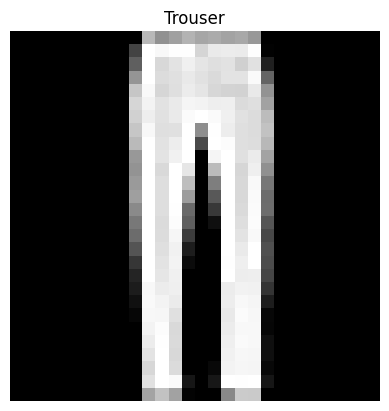

In [8]:
import random

image, label = train_data[random.randint(0, len(train_data))]
print(f"Image Shape: {image.shape}")

# squeeze tensor because matplotlib expects just the height and width data, not the color channel.
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

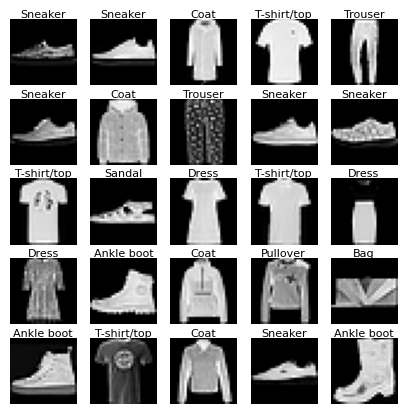

In [9]:
# Plot more images

fig = plt.figure(figsize=(5, 5))
rows, cols = 5, 5
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label], fontsize=8, pad=0.4)
  plt.axis(False)

Do we need a linear or non-linear model?

## Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

So, a DataLoader turns our dataset into a Python iterable.

More Specifically, we want to turn our data into batches (or mini-batches).

Why wound we do this?
- It is more computationally efficient, as in, the computer hardware may not be able to store  60000 images in one hit. So we break it down into smaller batches such as a batch of 32 or 64 or 128 images at a time.
- It gives our neural network more chances to update its gradients per epoch.

Research more about mini batches on the web.

In [10]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [11]:
# Create dataloader based on train_data
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# turn data into iterables
train_dataloader = DataLoader(
  dataset = train_data,
  batch_size = BATCH_SIZE,
  shuffle = True
)

test_dataloader = DataLoader(
  dataset = test_data,
  batch_size = BATCH_SIZE,
  shuffle = False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b6d49cb52a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b6d49cb7610>)

In [12]:
# Check out whats inside of the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])


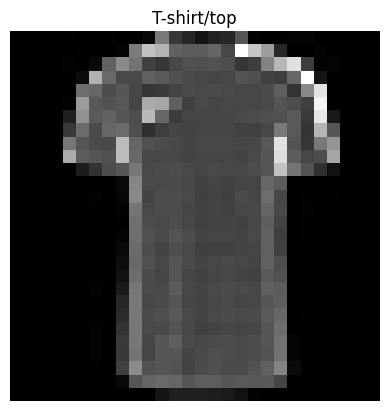

In [13]:
# Show a sample
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")

# Model 0 - Build a baseline model

When starting to build a series of machine learning modelling experiments, its best practice to start with a baseline model.

A Baseline model is a simple model you will try and imporve upon with subsequent models / experiments.

In other words, start simple and add complexity when necessary.

In [14]:
# Creating a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

x.shape, flatten_model(x).shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

- What flattening did, was combine (multiply) the height and width dimensions together, so that we have one value per pixel in our output vector.
- Why do we want to do this? Because in our baseline model, we will use a linear layer, and the linear layer can't take in two-dimensional values. We want it to have a single vector as input.

In [15]:
# Define Baseline Model
class FashionMNISTModelV0(nn.Module):
  def __init__(self, in_features, hidden_units, out_features):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=in_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=out_features)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [16]:
# Instantiate model
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTModelV0(
    in_features=784, # 28*28
    hidden_units= 16,
    out_features=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): Linear(in_features=16, out_features=10, bias=True)
  )
)

### Setup Loss function, optimizer, and evaluation metrics

- Loss function: Since we're working with multi-class data, our loss function will be `nn.CrossEntrypyLoss()`.
- Optimizer: `torch.optim.SGD`.
- Evaluation Metric: since we're working on a classification problem, let's use classification as our evaluation metric.

In [17]:
# Import accuracy_fn from helper_functions

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

In [18]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr=0.03
)

## Creating function to time our experiments

Machine Learning is very experimental.

Two of the main things we'll often want to track are:
1. Model's Performance (loss and accuracy values etc.)
2. How fast it runs

In [19]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  """Prints difference between start and end time"""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.2f} seconds")
  return total_time

## Creating a training loop
and training model on batches of data...

1. Loop through epochs
2. loop through training batches, perform training steps, calculate training loss per batch
3. Loop through testing batches, perform tesitng steps, calculate the test loss per batch
4. Print out whats happening
5. Time it all (for fun)

In [20]:
# Import tqdm for a progress bar
from tqdm.auto import tqdm

# set seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs - keeping it small for faster training time
epochs = 3

# create train test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")

  # Train
  train_loss = 0

  # add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # forward pass
    y_pred = model_0(X)

    # calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate training loss values by the batch

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

    # print whats happening (batch level)
    if batch % 500 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Calculate average training loss (epoch level)
  # divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  # Testitng
  model_0.eval()

  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # forward pass
      test_pred = model_0(X_test)

      # calculate loss
      test_loss += loss_fn(test_pred, y_test)

      # calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculaty the test acc average per batch
    test_acc /= len(test_dataloader)

  # print out whats happening
  print(f"\n Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

# Calculate train time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu ,
    device=str(next(model_0.parameters()).device)
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

 Train Loss: 0.6972, Test Loss: 0.5281, Test Acc: 81.16%
Epoch: 1
-----
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

 Train Loss: 0.4924, Test Loss: 0.4885, Test Acc: 82.61%
Epoch: 2
-----
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

 Train Loss: 0.4610, Test Loss: 0.4730, Test Acc: 83.36%
Train time on cpu: 27.74 seconds


## Get predictions and evaluate our model



In [21]:
# Defining function for evaluating models

torch.manual_seed(42)

def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device = None
):
  """Return a dictionary containing the results of model predicting on data loader"""
  loss, acc = 0, 0

  model.eval()

  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # set data on device
      if device:
        X, y = X.to(device), y.to(device)
      else:
        pass

      # make predictions
      y_pred = model(X)

      # Accumulate loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale the loss and acc to find average values
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {
      "model_name": model.__class__.__name__,
      "model_loss": loss.item(),
      "model_acc": acc
  }

In [22]:
# Calculate model_0's results on test datasets

model_0_results = eval_model(
    model_0,
    test_dataloader,
    loss_fn,
    accuracy_fn
)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4729822874069214,
 'model_acc': 83.35662939297124}

# Setup Device Agnostic Code to use a GPU in case there is one



In [23]:
# Write device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device}")

Using cuda


# Model 1 - Creating a model with non-linear functions

We learned about the power of non-linearity, in the `02`th notebook of this course.

## Creating and Instantiating Model

In [24]:
# Create a model with non-linear and linear layers.
class FashionMNISTModelV1(nn.Module):
  def __init__(self, in_features: int, hidden_units: int, out_features: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=in_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=out_features),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [25]:
# Instantiate model_1 and send to gpu
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(
    in_features = 784,
    hidden_units = 16,
    out_features = len(class_names)
).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

## Creating Loss Function and Optimizer

In [26]:
# Creating loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(
    params = model_1.parameters(),
    lr = 0.1
)

## Functionizing our train and test loop

Let's create (copy and paste) a function for:
- training loop: `train_step()`
- testing loop: `test_step()`



In [27]:
# Define Taining Step

def train_step(
  model: torch.nn.Module,
  data_loader: torch.utils.data.DataLoader,
  loss_fn: torch.nn.Module,
  optimizer: torch.optim.Optimizer,
  accuracy_fn,
  device: torch.device = device
):
  """Performs a training with model trying to learn on our data_loader"""

  train_loss, train_acc = 0, 0

  # put model in train mode
  model.train()

  # add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # put data on target device
    X, y = X.to(device), y.to(device)

    # forward pass
    y_pred = model(X)

    # calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

  # Calculate average training loss (epoch level)
  # divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  # Print out whats happening
  print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%\n")

# Define Testing Step
def test_step(
  model: torch.nn.Module,
  data_loader: torch.utils.data.DataLoader,
  loss_fn: torch.nn.Module,
  optimizer: torch.optim.Optimizer,
  accuracy_fn,
  device: torch.device = device
):
  """Performs a testing loop on model going over our data_loader"""

  # Testitng
  model.eval()

  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for X, y in data_loader:
      # Putting data on device
      X, y = X.to(device), y.to(device)

      # forward pass
      test_pred = model(X)

      # calculate loss
      test_loss += loss_fn(test_pred, y)

      # calculate accuracy
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # calculate the test loss average per batch
    test_loss /= len(data_loader)

    # calculaty the test acc average per batch
    test_acc /= len(data_loader)

    # print out whats happening
    print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%\n")

## Training and Testing `model_1`

In [28]:
from helper_functions import set_seeds

set_seeds(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a train and test loop using functions
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n")

  # Train
  train_step(
      model=model_1,
      data_loader = train_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn = accuracy_fn,
      device = device
  )

  # Test
  test_step(
      model = model_1,
      data_loader = test_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn = accuracy_fn,
      device = device
  )

# Measure time again
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train Loss: 1.0263, Train Acc: 65.97%

Test Loss: 0.9624, Test Acc: 67.33%

Epoch: 1

Train Loss: 0.8698, Train Acc: 69.36%

Test Loss: 0.8839, Test Acc: 69.39%

Epoch: 2

Train Loss: 0.8390, Train Acc: 70.27%

Test Loss: 0.8474, Test Acc: 70.08%

Train time on cuda: 30.51 seconds


> Note: Sometimes, Depending on data or hardware, sometimes the model trains faster on the CPU than the GPU.
> Reasons:
> 1. It could be that the overhead for copying data / model to and from the GPU outweights the compute benefits offered by the GPU.  
> 2. The hardware that you're using had a better CPU in terms of compute capability than the GPU.

In [29]:
# Get model_1 results dictionary
model_1_results = eval_model(
    model = model_1,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

print(f"model_0:\n {model_0_results},\n model_1:\n {model_1_results}")

  0%|          | 0/313 [00:00<?, ?it/s]

model_0:
 {'model_name': 'FashionMNISTModelV0', 'model_loss': 0.4729822874069214, 'model_acc': 83.35662939297124},
 model_1:
 {'model_name': 'FashionMNISTModelV1', 'model_loss': 0.847381591796875, 'model_acc': 70.07787539936102}


- As visible, our baseline model is still leading in terms of accuracy, so let's step into convolutional neural networks.

# Model 2 - Building a Convolutional Neural Network (CNN)

CNNs are also known as ConvNets

CNNs are known for their capability to trace patterns in visual data.

Layers in a CNN:
- Input Layer - Takes in target images.  
- Convolution Layer - Extracts / Learns the most important features.  
- Hidden Activation / Non-Linear Activation - Adds non-linearity to the learned features.  
- Pooling Layer - Reduces the dimensionality of the learned image features.
- Output Layer / Linear Layer - Takes learned features and outputs them in shape of target labels.

To find out whats happening inside of a CNN, take a look at [CNN Explainer](https://poloclub.github.io/cnn-explainer/)

In [30]:
# Coding a CNN

class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicated the TinyVGG
  model from the CNN Explainer webiste
  """

  def __init__(self, in_features: int, hidden_units: int, out_features: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(
        in_channels=in_features,
        out_channels= hidden_units,
        kernel_size=3,
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.Conv2d(
        in_channels=hidden_units,
        out_channels=hidden_units,
        kernel_size=3,
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.MaxPool2d(
          kernel_size=2
      )
    )

    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(
        in_channels=hidden_units,
        out_channels= hidden_units,
        kernel_size=3,
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.Conv2d(
        in_channels=hidden_units,
        out_channels=hidden_units,
        kernel_size=3,
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.MaxPool2d(
          kernel_size=2
      )
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=out_features)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

## Instantiate CNN Model

In [41]:
set_seeds(42)

# Instantiate model
model_2 = FashionMNISTModelV2(
    in_features=1,
    hidden_units=32,
    out_features=len(class_names)
).to(device)

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=10, bias=True)
  )
)

## Stepping Through `nn.Conv2d`

In [42]:
torch.manual_seed(42)

# create a random image batch
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

# print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
# print(f"Test image:\n {test_image}")

Single image shape: torch.Size([3, 64, 64])


In [43]:
# Create a single Conv2d layer

conv_layer = nn.Conv2d(
  in_channels=3,
  out_channels=10,
  kernel_size=3,
  stride=1,
  padding=1
)

# Pass the test image through the Conv2d layer
conv_output = conv_layer(test_image)

print(f"Conv2d output shape: {conv_output.shape}")

Conv2d output shape: torch.Size([10, 64, 64])


## Stepping through `nn.MaxPool2d`

In [44]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_output = max_pool_layer(conv_output)

print(f"Max pool output shape: {max_pool_output.shape}")

Max pool output shape: torch.Size([10, 32, 32])


## Setting up loss function and optimizer for `model_2`

In [45]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
  params=model_2.parameters(),
  lr=0.1
)


## Training and testing `model_2`

In [46]:
# Set seeds
set_seeds(42)

# measure the time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n -----")

  # train
  train_step(
    model=model_2,
    data_loader=train_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    accuracy_fn=accuracy_fn
  )

  # test
  test_step(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    accuracy_fn=accuracy_fn
  )

  # calculate time
  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(
    start=train_time_start_model_2,
    end=train_time_end_model_2,
    device=device
  )

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 
 -----
Train Loss: 0.5127, Train Acc: 81.51%

Test Loss: 0.3443, Test Acc: 87.67%

Train time on cuda: 12.08 seconds
Epoch: 1 
 -----
Train Loss: 0.3093, Train Acc: 88.84%

Test Loss: 0.2979, Test Acc: 89.48%

Train time on cuda: 23.98 seconds
Epoch: 2 
 -----
Train Loss: 0.2691, Train Acc: 90.33%

Test Loss: 0.2711, Test Acc: 90.62%

Train time on cuda: 35.92 seconds
Epoch: 3 
 -----
Train Loss: 0.2448, Train Acc: 91.31%

Test Loss: 0.2723, Test Acc: 90.05%

Train time on cuda: 47.80 seconds
Epoch: 4 
 -----
Train Loss: 0.2280, Train Acc: 91.78%

Test Loss: 0.2626, Test Acc: 90.71%

Train time on cuda: 60.78 seconds


In [47]:
# calculate model results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.26264747977256775,
 'model_acc': 90.71485623003196}

## Compare model results and training time

In [48]:
# using pandas to compare results and show in the form of a table
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.472982,83.356629
1,FashionMNISTModelV1,0.847382,70.077875
2,FashionMNISTModelV2,0.262647,90.714856


In [49]:
# add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.472982,83.356629,27.736751
1,FashionMNISTModelV1,0.847382,70.077875,30.506718
2,FashionMNISTModelV2,0.262647,90.714856,60.775439


Text(0, 0.5, 'Model')

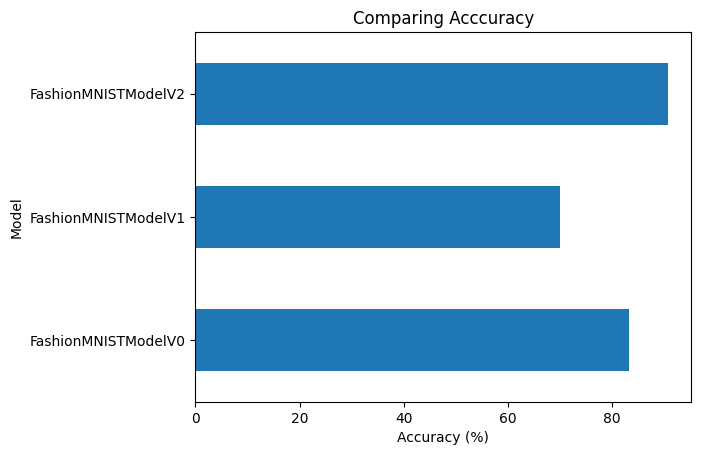

In [52]:
# visualize our model results through graphs
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.title("Comparing Acccuracy")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")

Text(0, 0.5, 'Model')

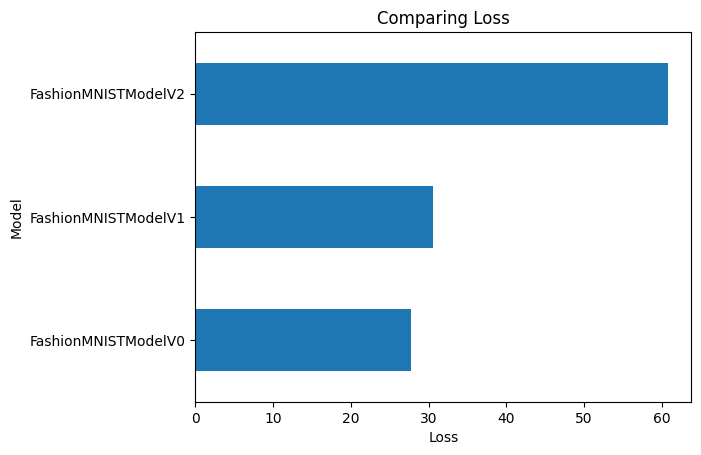

In [54]:
compare_results.set_index("model_name")["training_time"].plot(kind="barh")
plt.title("Comparing Loss")
plt.xlabel("Loss")
plt.ylabel("Model")

- As visible, `FashionMNISTModelV2` is the most accurate out of all the three models we made in this nodebook to work with the Fashion MNIST dataset, but was the slowest between the three.

## Making and evaluating predictions on random test samples with `model_2`

In [55]:
def make_predictions(
  model: torch.nn.Module,
  data: list,
  device: torch.device = device
):
  pred_probs=[]

  # making inferences
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare data - add a batch dimension and pass to the target device
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # do a forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # get prediction probabilities (logit -> prediction porbability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # append pred probs with changing device (for matplotlib)
      pred_probs.append(pred_prob.cpu())

  # stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [79]:
# inport random and set seed
import random
# random.seed(42)

# defien sample and labels list
test_samples = []
test_labels = []

# get samples
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# make predictions
pred_probs = make_predictions(
  model=model_2,
  data=test_samples
)

# convert pred probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes, test_labels

(tensor([6, 6, 9, 0, 0, 3, 2, 0, 0]), [6, 6, 9, 0, 2, 3, 2, 0, 0])

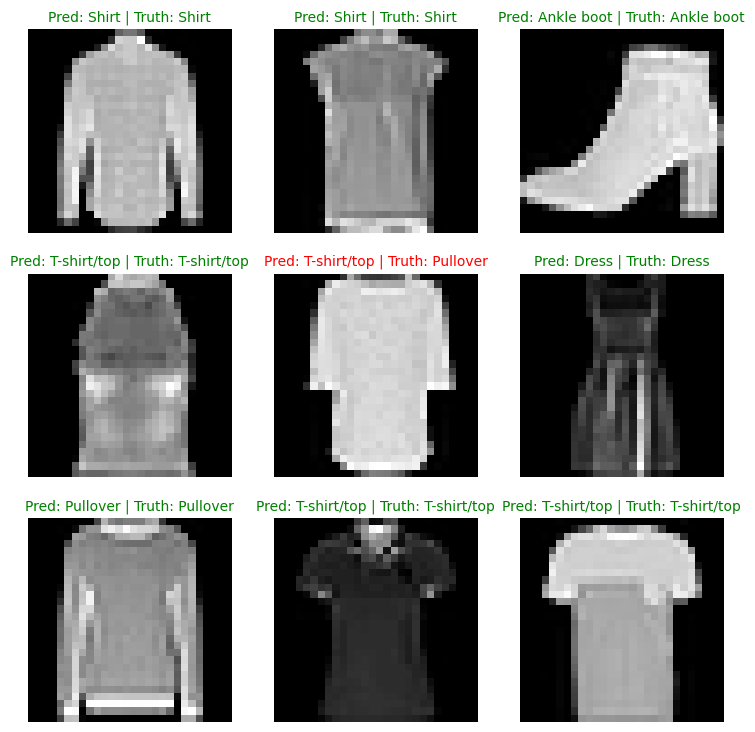

In [80]:
# plot the predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows, ncols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # find the prediction label (in text form)
  pred_label = class_names[pred_classes[i]]

  # get truth label
  truth_label = class_names[test_labels[i]]

  # create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # check for eqiality
  if pred_label == truth_label:
    color = "green"
  else:
    color = "red"

  # change the color of the title text
  plt.title(title_text, color=color, fontsize=10)
  plt.axis(False)

## Predicting and evaluating model across the whole dataset with a confusion matrix

1. Make predictions with our trained model on the test dataset
2. make a confusion matriz `torchmetrix.ConfusionMatrix`.
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`.

In [82]:
# Make predictions with trained model
y_preds = []

# set in eval mode
model_2.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # put to device
    X, y = X.to(device), y.to(device)

    # forward pass
    y_logit = model_2(X)

    # turn predictions from logits to prediction probs to prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    # put prediction on cpu then append to list
    y_preds.append(y_pred.cpu())

  # concatenate list of predictions into a tensor
  y_pred = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 0, 1, 4, 6, 5, 7])


In [85]:
# import mlxtend and check version ( >>1.19.0 )
import mlxtend
mlxtend.__version__

'0.22.0'

In [87]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 7.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

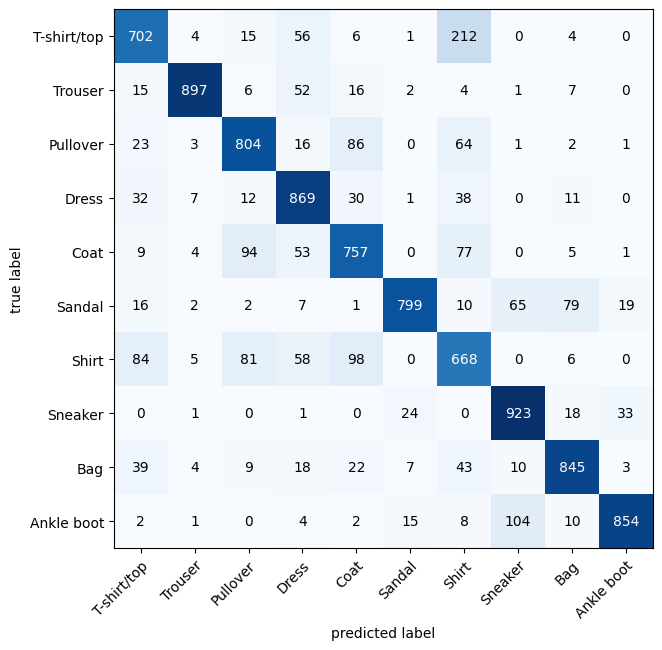

In [89]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare predictions to target
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred, target=test_data.targets)

# plot the confmat
fig, ax = plot_confusion_matrix(
  conf_mat=confmat_tensor.numpy(),
  class_names=class_names,
  figsize=(10, 7)
)